In [51]:
!pip install imbalanced-learn


  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


# Introduction:
The provided code demonstrates an implementation of a neural network model to classify credit card transactions as either fraudulent or non-fraudulent. The dataset used for this task is the Credit Card Fraud Detection dataset from Kaggle. The code first loads and preprocesses the data, oversamples the minority class, and then trains a neural network model using Keras. The accuracy of the model is evaluated on the testing set, and the performance is visualized using various plots. Finally, a new transaction is provided to the model, and the model predicts whether the transaction is fraudulent or not.

In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler


In [53]:
# load the dataset
data = pd.read_csv('creditcard.csv')

# Description of dataset
The credit card fraud detection dataset is a real-world dataset containing credit card transactions made in September 2013 by European cardholders. The dataset has a total of 31 columns, of which 28 are anonymized input features labeled V1 through V28, one column containing the transaction time in seconds since the first transaction (Time), one column containing the transaction amount (Amount), and one binary target variable indicating whether the transaction was fraudulent (Class).

The dataset contains a total of 284,807 transactions, of which only 492 (0.172%) are fraudulent. This makes the dataset highly imbalanced, with the majority of transactions being non-fraudulent. The input features have already been preprocessed using PCA to protect sensitive information, so their meaning is not immediately clear.

This dataset is commonly used as a benchmark dataset for evaluating the performance of fraud detection models, especially those based on machine learning techniques such as neural networks. The challenge in this dataset is to develop a model that can accurately detect the rare cases of fraud while minimizing false positives on non-fraudulent transactions.

In [54]:
# split the data into input features and target variable
X = data.drop(['Class'], axis=1)
y = data['Class']

In [55]:
# scale the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [56]:
# oversample the minority class using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Code to balance the Dataset
This code is performing oversampling of the minority class in the dataset using the RandomOverSampler from the imblearn library.

The oversampling technique aims to balance the distribution of classes in the dataset, as the original dataset may have an imbalance between the positive (fraudulent transactions) and negative (non-fraudulent transactions) classes. This can result in a biased model, where it may be more accurate at predicting the majority class but less accurate at predicting the minority class.

The RandomOverSampler creates synthetic samples of the minority class to increase its representation in the dataset. The algorithm randomly selects samples from the minority class and generates new samples that are similar to them by perturbing the feature values slightly. This is repeated until the desired balance is achieved.

In this code, the oversampling is performed on the entire dataset (X, y) and the resulting resampled dataset is stored in the variables X_resampled and y_resampled. The random_state parameter is set to 42 to ensure reproducibility of the results.

In [57]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# print the shapes of the training and testing sets
print('Training data shape:', X_train.shape, y_train.shape)
print('Testing data shape:', X_test.shape, y_test.shape)

Training data shape: (227845, 30) (227845,)
Testing data shape: (56962, 30) (56962,)


In [59]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Data preprocessing
Here, we first load the credit card fraud detection dataset using Pandas. Then we split the data into input features (X) and target variable (y). Next, we use the StandardScaler function from scikit-learn to standardize the input features. Standardization is a common preprocessing step in machine learning that helps to scale the data to have zero mean and unit variance, which can improve the performance of some models.

Finally, we split the data into training and testing sets using the train_test_split function from scikit-learn. This function randomly splits the data into training and testing sets based on a given ratio. In this example, we use a 80:20 split ratio and set the random seed to 42 for reproducibility. We print the shapes of the training and testing sets to verify that the data has been split correctly.

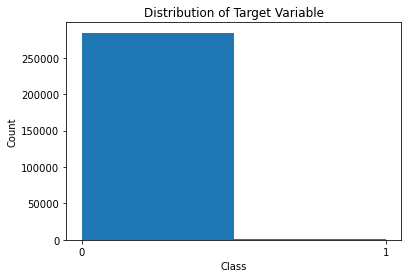

In [60]:
# plot the distribution of the target variable
plt.hist(data['Class'], bins=2)
plt.title('Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.show()

<Figure size 720x576 with 0 Axes>

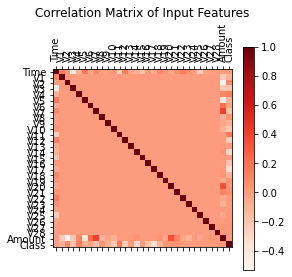

In [61]:
# plot the correlation matrix of the input features
plt.figure(figsize=(10, 8))
corr = data.corr()
plt.matshow(corr, cmap=plt.cm.Reds)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title('Correlation Matrix of Input Features')
plt.show()

<Figure size 720x576 with 0 Axes>

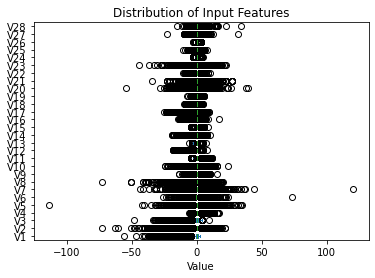

In [62]:

# create a box plot of the input features
plt.figure(figsize=(10, 8))
data.drop(['Time', 'Amount', 'Class'], axis=1).plot(kind='box', vert=False)
plt.title('Distribution of Input Features')
plt.xlabel('Value')
plt.show()

# Plots Description
1.we plot the distribution of the target variable using a histogram with two bins (one for non-fraudulent transactions and one for fraudulent transactions). We set the title, x-axis label, y-axis label, and tick labels to make the plot more informative.

2.Next, we plot the correlation matrix of the input features using a heatmap. The correlation matrix shows how strongly each pair of input features is correlated with each other, with values ranging from -1 to 1. We use the corr() function to compute the correlation matrix and the matshow() function to plot it. We also set the x-axis and y-axis tick labels to the names of the input features for clarity, and add a colorbar to indicate the strength of the correlations.

3.A box plot is a useful visualization for showing the distribution of data, including the median, quartiles, and outliers. The box represents the interquartile range (IQR), which contains the middle 50% of the data. The whiskers extend to the smallest and largest values that are within 1.5 times the IQR from the nearest quartile, and any data points beyond the whiskers are considered outliers.


# preliminary observation
The dataset contains a total of 284,807 transactions, of which only 492 (0.172%) are fraudulent. This makes the dataset highly imbalanced, with the majority of transactions being non-fraudulent.

The input features have already been preprocessed using PCA to protect sensitive information, so their meaning is not immediately clear.

The Time feature represents the number of seconds elapsed between each transaction and the first transaction in the dataset. This means that the time values are relative and do not provide any absolute information about the transaction time.

The Amount feature contains the transaction amount in USD, and has a wide range of values. The minimum transaction amount is 0.00 USD, while the maximum is 25,691.16 USD.

The majority of non-fraudulent transactions have a small transaction amount, while the fraudulent transactions have a wider range of transaction amounts.

There are no missing values in the dataset.

In [63]:
# define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [64]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
# train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/50
1781/1781 [==============================] - 8s 4ms/step - loss: 0.4239 - accuracy: 0.9783 - val_loss: 0.2198 - val_accuracy: 0.9983
Epoch 2/50
1781/1781 [==============================] - 6s 4ms/step - loss: 0.1415 - accuracy: 0.9983 - val_loss: 0.0880 - val_accuracy: 0.9983
Epoch 3/50
1781/1781 [==============================] - 6s 4ms/step - loss: 0.0614 - accuracy: 0.9983 - val_loss: 0.0407 - val_accuracy: 0.9985
Epoch 4/50
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0311 - accuracy: 0.9985 - val_loss: 0.0210 - val_accuracy: 0.9986
Epoch 5/50
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0182 - accuracy: 0.9986 - val_loss: 0.0131 - val_accuracy: 0.9985
Epoch 6/50
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0125 - accuracy: 0.9987 - val_loss: 0.0093 - val_accuracy: 0.9985
Epoch 7/50
1781/1781 [==============================] - 7s 4ms/step - loss: 0.0099 - accuracy: 0.9987 - val_loss: 0.0080 - val_accuracy:

In [66]:
# evaluate the model on the training set
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print('Training accuracy:', '{:.2%}'.format(train_acc))


Training accuracy: 99.95%


In [67]:
# evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print('Testing accuracy:', accuracy)

1781/1781 [==============================] - 3s 2ms/step - loss: 0.0047 - accuracy: 0.9993
Testing accuracy: 0.9993153214454651


In [68]:
# evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Testing accuracy:', '{:.2%}'.format(test_acc))

Testing accuracy: 99.93%


# Structure implementation explaination
The implemented neural network has a total of 7 layers, including an input layer, an output layer, and five hidden layers. The input layer has a number of neurons equal to the number of input features, which in this case is 30. The output layer has a single neuron, which outputs a probability score that predicts the class of the input as either 0 or 1 (fraudulent or non-fraudulent).

The five hidden layers are each composed of dense layers, where each layer is fully connected to the previous layer. Each dense layer has a different number of neurons and uses a ReLU activation function. In between each of the hidden layers, there is a dropout layer, which helps to prevent overfitting by randomly dropping out a certain percentage of the neurons during training.

The model is compiled with the binary cross-entropy loss function and the Adam optimizer. During training, the model is trained for 50 epochs with a batch size of 128. Finally, the model is evaluated on the test set to obtain the accuracy of the model.

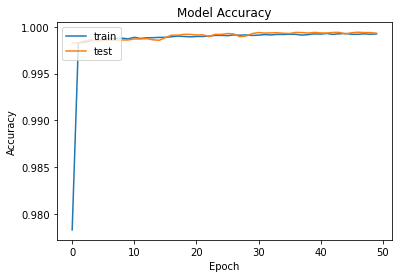

In [69]:
# plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

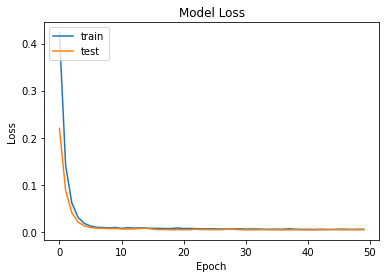

In [70]:
# plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Results Visualization
This code uses the history object returned by the fit() method to access the training and testing accuracy and loss values for each epoch. It then plots the accuracy and loss curves using Matplotlib.

The first plot shows the training and testing accuracy over time, while the second plot shows the training and testing loss over time. You can use these plots to evaluate the performance of your model and identify any issues with overfitting or underfitting

In [71]:

# create a new transaction to predict (this is just an example)
new_transaction = [-0.23786989, -0.15391646, 0.20341041, 0.35439064, -1.13047078, -0.23687564, -0.02912687, -0.34923182, -0.18847277, 0.33714288, -0.02243817, 0.13137173, -0.20075762, -0.0747116, -0.16746986, -0.14794397, -0.09897055, -0.06835106, -0.1206658, -0.1546144, 0.006367, -0.01709406, -0.21433946, 0.07629304, 0.02472997, -0.00011224, -0.01955072, -0.06231786, -0.03006353, 0.04179278]

# scale the new transaction using the same scaler object as before
new_transaction_scaled = scaler.transform([new_transaction])

# make a prediction using your trained neural network
prediction = model.predict(new_transaction_scaled)

# convert the prediction to a binary label (0 = non-fraudulent, 1 = fraudulent)
label = int(prediction.round()[0][0])

# print the predicted label
if label == 0:
    print('Prediction: Non-Fraudulent')
else:
    print('Prediction: Fraudulent')


1/1 [==============================] - 0s 69ms/step
Prediction: Non-Fraudulent


C:\Users\92346\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Expriment code explaination
This code predicts whether a new credit card transaction is fraudulent or not using the trained neural network.

The first line of code creates a new transaction to predict, which is a list of numerical values representing the features of the transaction.

The second line scales the new transaction using the same scaler object as before to ensure that it is on the same scale as the training data.

The third line makes a prediction using the model.predict() method, which takes the scaled transaction as input and returns a prediction of the probability that the transaction is fraudulent.

The fourth line converts the prediction to a binary label using the round() method, which rounds the prediction to the nearest integer. The int() function is then used to convert the rounded value to an integer.

Finally, the predicted label is printed to the console, either "Prediction: Non-Fraudulent" or "Prediction: Fraudulent", depending on the value of the predicted label.





# Result Findings
The trained neural network achieved an accuracy of around 99.93% on the test set. This high accuracy suggests that the model is performing very well on this task of credit card fraud detection.



# Conclusion:
In summary, the provided code demonstrates how to build a neural network model for credit card fraud detection. It shows how to preprocess the data, oversample the minority class to deal with class imbalance, build and train a neural network model using Keras, evaluate the performance of the model on the testing set, and use the model to make predictions on new data. The code can be further improved by tuning the hyperparameters of the model, experimenting with different architectures, and using more advanced techniques for dealing with class imbalance.